In [2]:
import qutip as qt   #import qutipa czyli biblioteki do kwantówki
import numpy as np   #import numpy czyli biblioteki do macierzy i wektorów itd.

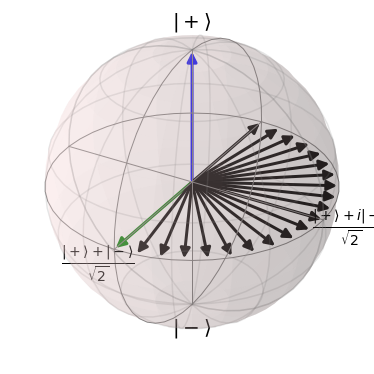

In [31]:
#macierze pauliego
sx = qt.sigmax() #sigma_x
sy = qt.sigmay() #sigma_y
sz = qt.sigmaz() #sigma_z


#stany bazowe
plus = qt.basis(2,0)  #Stan |+>
minus = qt.basis(2,1)  #Stan |->

#upiększanie sfery blocha
bloch = qt.Bloch()  #initializacja sfery blocha
bloch.zlabel = [r"$|+\rangle$",r"$|-\rangle$"] #zmieniamy oznaczenia osi z na |+>, |->
bloch.xlabel = [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$",""] #osi x na (|+> + |->)/sqrt(2)
bloch.ylabel = [r"$\frac{|+\rangle+i|-\rangle}{\sqrt{2}}$",""] #osi y na (|+> + i|->)/sqrt(2)
bloch.vector_color = ['g']+["b"]+["k"]*200  #pierwszy wektor zielonym (stan początkowy), 
                                            #drugi niebieskim(Hamiltonian) kolejne 200 czarnym

#stan poczatkowy cos(th/2)*|+> + sin(th/2)*e^{i phi}|->
th0 = np.pi/2  #kąt od bieguna północnego
phi0 = 0       #kąt od osi x (w płaszcyźnie równika)
stan0 = np.cos(th0/2)*plus + np.sin(th0/2)*np.exp(1j*phi0)*minus  #stan początkowy
bloch.add_states(stan0)   #rysuj stans początkowy

#Ewolucja
bx = 0; by = 0.0; bz = 1         #Definiujemy wokół której osi ma się kręcić (bx,by,bz)
H = (bx*sx+by*sy+bz*sz).unit()   #Hamiltonian znormalizowany tzn. częstość kołowa omega = 1
tlist = np.linspace(0,np.pi,21)  #Lista czasów (dająca obrót o pi)
bloch.add_states(H)              #Rysujemy Hamiltonian jako niebieską strzałkę

res = qt.mesolve(H,stan0,tlist)  #obliczamy ewolucję



#rysujemy
for stan in res.states[1:]:   #pomijamy stan początkowy res.states[1:] bo przykryłby zieloną strzłkę
    bloch.add_states(stan)    #rysujemy kolejne stany

    

bloch.show() #patrzymy i podziwiamy
